In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from pprint import pprint

In [2]:
def getCsvData(csvFilePath):
    
    with open(csvFilePath, newline='') as csvFile:
        reader = csv.reader(csvFile, delimiter=',')
        result = list(reader)

    return result
    

In [3]:
csvData = getCsvData('results/agfw-100.csv')
print('Csv total rows:', len(csvData) - 1)
print('Csv data header:', csvData[0])
print('Csv data sample:', csvData[1])

Csv total rows: 26347
Csv data header: ['Real age', 'Gender', 'Predicted age', 'Absolute age difference']
Csv data sample: ['45-49', 'f', '56', '7']


In [4]:
imageNumberPerAgeList = {}
for i in range(1, len(csvData)):
    
    realAge = csvData[i][0]
    if realAge not in imageNumberPerAgeList.keys():
        imageNumberPerAgeList[realAge] = 0
    
    imageNumberPerAgeList[realAge] += 1
    

     Age  Image number
1  10-14          1600
7  15-19          2454
3  20-24          5522
4  25-29          5113
2  30-34          3914
8  35-39          2409
6  40-44          1761
0  45-49          1635
5  50-54          1198
9  55-59           741


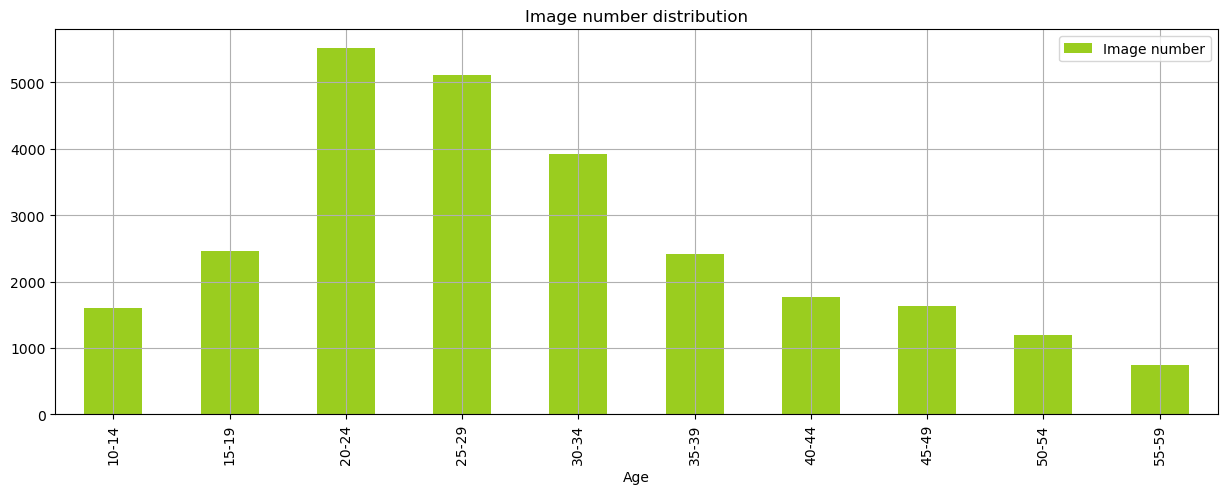

In [10]:
ageList = list(imageNumberPerAgeList.keys())
imageNumberList = list(imageNumberPerAgeList.values())

dataDict = {
    'Age': ageList,
    'Image number': imageNumberList,
}
 
df = pd.DataFrame(dataDict)
df = df.sort_values(by=['Age'])

print(df)

df.plot(kind='bar', x='Age', y='Image number', color='#9acd1f')
plt.title('Image number distribution')
plt.rcParams['figure.figsize'] = [15, 5]
 
plt.grid(True)
plt.show()

In [11]:
ageDiffPerAgeList = {}
for i in range(1, len(csvData)):
    
    realAge = csvData[i][0]
    ageDifference = csvData[i][3]
    
    if realAge not in ageDiffPerAgeList.keys():
        ageDiffPerAgeList[realAge] = []
    
    ageDiffPerAgeList[realAge].append(int(ageDifference))

    
maePerAgeList = {}
for i in ageDiffPerAgeList:
    
    maePerAgeList[i] = sum(ageDiffPerAgeList[i]) / len(ageDiffPerAgeList[i])
    maePerAgeList[i] = float(f'{maePerAgeList[i]:.2f}')


     Age   Mae
1  10-14  3.30
7  15-19  2.67
3  20-24  1.76
4  25-29  2.54
2  30-34  3.79


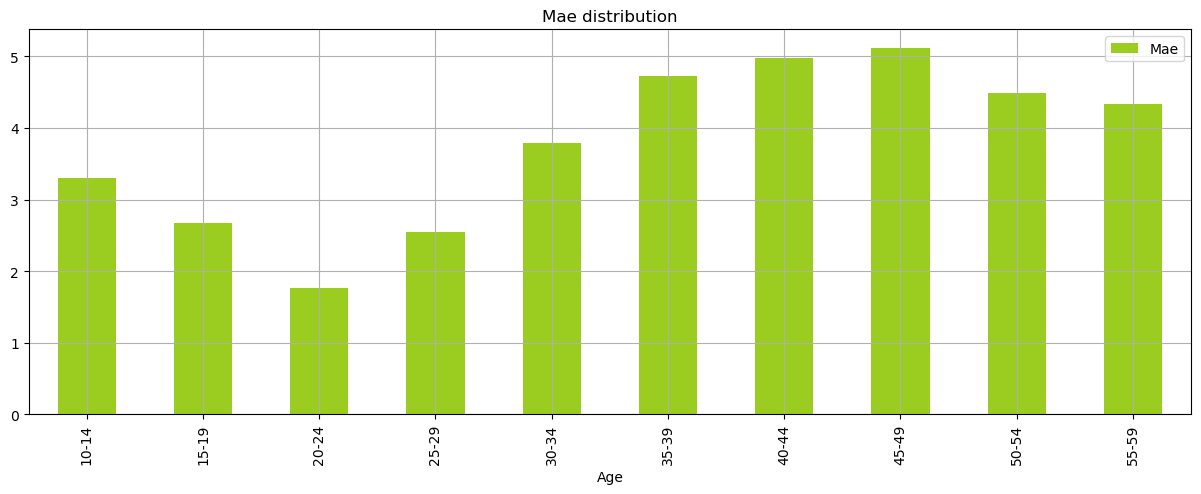

In [12]:
ageList = list(maePerAgeList.keys())
maeList = list(maePerAgeList.values())

dataDict = {
    'Age': ageList,
    'Mae': maeList,
}
 
df = pd.DataFrame(dataDict)
df = df.sort_values(by=['Age'], key=lambda x: x.astype(str))

print(df.head())

df.plot(kind='bar', x='Age', y='Mae', color='#9acd1f')
plt.title('Mae distribution')
plt.rcParams['figure.figsize'] = [15, 5]
 
plt.grid(True)
plt.show()